In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
hexsha_df = pd.read_csv('../../../../sample_data/data/camel_in_spiral/hexsha_filename_camel.txt',
                        header=None,
                        names=["id","commit_hash", "before_filename", "after_filename","change_type"]
                        )

In [3]:
def excute(i):
    dic = {}
    with open('../../../../sample_data/data/camel_in_spiral/snippet_camel_'+str(i)+'.txt') as f:
        while True:
            line = f.readline()
            if line == '':
                break
            tmp = line.split('\t')
            # if tmp[1].strip() != '':
            #     dic[tmp[0]] = len(tmp[1:])
            dic[tmp[0]] = len(tmp[1:])

    id_list = []
    id2_list = []
    for key in dic.keys():
        tmp = key.split('-')
        id_list.append(int(tmp[0]))
        id2_list.append(int(tmp[1]))
        
    length_df = pd.DataFrame(
        data= {'id':id_list,
            'id2':id2_list,
            'snippet_length':dic.values()
            }
    )

    df = pd.merge(length_df, hexsha_df, on='id', how='left')
    df.to_csv('../label/camel_'+str(i)+'.csv')

In [8]:
for i in range(0,11):
    excute(i)

In [22]:
df_list = []
for i in range(0, 11):
    df  = pd.read_csv('../label/camel_'+str(i)+'.csv')
    df_list.append(df)

In [23]:
df_list[0]

,Unnamed: 0,id,id2,snippet_length,commit_hash,before_filename,after_filename,change_type
0,0,1,1,37,77b260b65ba821b3443d922320cc3d9b708c8d83,camel/camel-core/src/main/java/org/apache/came...,camel/camel-core/src/main/java/org/apache/came...,A
1,1,2,1,28,77b260b65ba821b3443d922320cc3d9b708c8d83,camel/camel-core/src/main/java/org/apache/came...,camel/camel-core/src/main/java/org/apache/came...,A
2,2,3,1,88,77b260b65ba821b3443d922320cc3d9b708c8d83,camel/camel-core/src/main/java/org/apache/came...,camel/camel-core/src/main/java/org/apache/came...,A
3,3,4,1,31,77b260b65ba821b3443d922320cc3d9b708c8d83,camel/camel-core/src/main/java/org/apache/came...,camel/camel-core/src/main/java/org/apache/came...,A
4,4,5,1,114,77b260b65ba821b3443d922320cc3d9b708c8d83,camel/camel-core/src/main/java/org/apache/came...,camel/camel-core/src/main/java/org/apache/came...,A
...,...,...,...,...,...,...,...,...
723425,723425,215351,3,16,e2d6c518df53fa0d06a7d308acff377993e80278,components/camel-jsonpath/src/test/java/org/ap...,components/camel-jsonpath/src/test/java/org/ap...,M
723426,723426,215352,1,3,e2d6c518df53fa0d06a7d308acff377993e80278,components/camel-jsonpath/src/test/java/org/ap...,components/camel-jsonpath/src/test/java/org/ap...,M
723427,723427,215352,2,4,e2d6c518df53fa0d06a7d308acff377993e80278,components/camel-jsonpath/src/test/java/org/ap...,components/camel-jsonpath/src/test/java/org/ap...,M
723428,723428,215353,1,3,e2d6c518df53fa0d06a7d308acff377993e80278,components/camel-jsonpath/src/test/java/org/ap...,components/camel-jsonpath/src/test/java/org/ap...,M


In [24]:
df_list2 = []
for i, df in enumerate(df_list):
    df['id'] = i
    df_list2.append(df[['id','id2','change_type','snippet_length']])

In [25]:
df_list2[0]

,id,id2,change_type,snippet_length
0,0,1,A,37
1,0,1,A,28
2,0,1,A,88
3,0,1,A,31
4,0,1,A,114
...,...,...,...,...
723425,0,3,M,16
723426,0,1,M,3
723427,0,2,M,4
723428,0,1,M,3


In [26]:
con_df = pd.concat(df_list2, axis=0)
con_df

,id,id2,change_type,snippet_length
0,0,1,A,37
1,0,1,A,28
2,0,1,A,88
3,0,1,A,31
4,0,1,A,114
...,...,...,...,...
332394,10,1,M,40
332395,10,1,M,40
332396,10,2,M,50
332397,10,1,M,47


In [27]:
con_df[['id','change_type', 'snippet_length']].groupby(['id','change_type'], as_index=False).agg(['count','mean','std','median','max','min'])

snippet_length                                          
                        count        mean         std median    max min
id change_type                                                         
0  A                    26487  467.820667  791.192629  301.0  49908  12
   M                   674647    8.916091   54.268074    2.0  31793   1
   R                    22296    4.158414   12.637497    2.0    492   1
1  A                    26487  467.820667  791.192629  301.0  49908  12
   M                   504524   14.335050   63.731526    5.0  31795   1
   R                    16422    8.092376   17.046105    4.0    588   2
2  A                    26487  467.820667  791.192629  301.0  49908  12
   M                   456297   18.640550   68.880602    8.0  31797   1
   R                    14646   11.789294   20.777338    7.0   1120   3
3  A                    26487  467.820667  791.192629  301.0  49908  12
   M                   429649   22.578596   72.156068   12.0  31800   1
   R                    13720   14.900510   22.742699   10.0   1129   4
4  A                    26487  467.820667  791.192629  301.0  49908  12
   M                   403821   26.610959   75.270016   15.0  31801   1
   R                    12729   18.601147   24.706578   12.0   1131   5
5  A                    26487  467.820667  791.192629  301.0  49908  12
   M                   383589   30.588043   77.947693   18.0  31804   1
   R                    12066   21.952428   26.566257   15.0   1133   6
6  A                    26487  467.820667  791.192629  301.0  49908  12
   M                   368403   34.416359   80.492989   21.0  31805   1
   R                    11276   25.971976   29.500557   17.0   1135   7
7  A                    26487  467.820667  791.192629  301.0  49908  12
   M                   355876   38.272435   82.726529   24.0  31806   1
   R                    10547   30.165545   33.241305   20.0   1172   8
8  A                    26487  467.820667  791.192629  301.0  49908  12
   M                   345983   41.742612   84.713435   27.0  31807   1
   R                    10045   33.994027   35.762742   22.0   1174   9
9  A                    26487  467.820667  791.192629  301.0  49908  12
   M                   322044   47.473848   93.657292   30.0  31808   1
   R                     9518   38.184177   40.369677   25.0   1176  10
10 A                    26487  467.820667  791.192629  301.0  49908  12
   M                   296782   53.971582  104.056103   34.0  31811   1
   R                     9130   41.804381   47.029680   27.0   1428  12

In [30]:
# ソースコード片の単語数　90%ライン
threshold_list = []
target_ratio = 0.9
for i , df in enumerate(df_list2):
    sorted_df = df.sort_values('snippet_length')
    cumulative_sum = sorted_df['snippet_length'].cumsum()
    cumulative_ratio = cumulative_sum / cumulative_sum.max()

    threshold_value = sorted_df.loc[cumulative_ratio >= target_ratio, 'snippet_length'].iloc[0]
    threshold_list.append(threshold_value)
    print(str(i)+':'+str(threshold_value))
    

0:2592
1:2455
2:2327
3:2248
4:2123
5:2066
6:1987
7:1906
8:1853
9:1824
10:1799


In [33]:
avg = sum(threshold for threshold in threshold_list) / len(threshold_list)
avg

2107.2727272727275

C:\Users\masak\AppData\Local\Temp\ipykernel_24556\3357831706.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['snippet_length_range'] = pd.cut(df2['snippet_length'], bins=bins, labels=labels)
C:\Users\masak\AppData\Local\Temp\ipykernel_24556\3357831706.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['snippet_length_range'] = pd.cut(df2['snippet_length'], bins=bins, labels=labels)
C:\Users\masak\AppData\Local\Temp\ipykernel_24556\3357831706.py:5: SettingWithCopyWarning: 
A value is trying to b

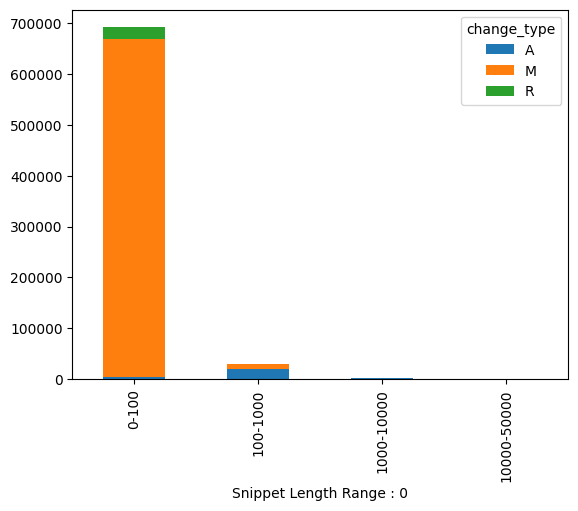

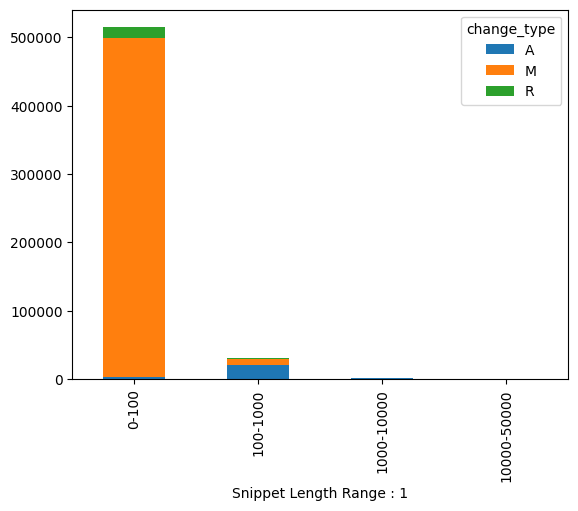

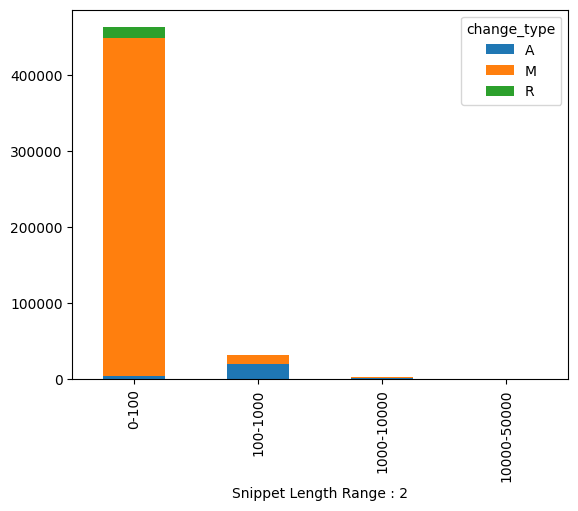

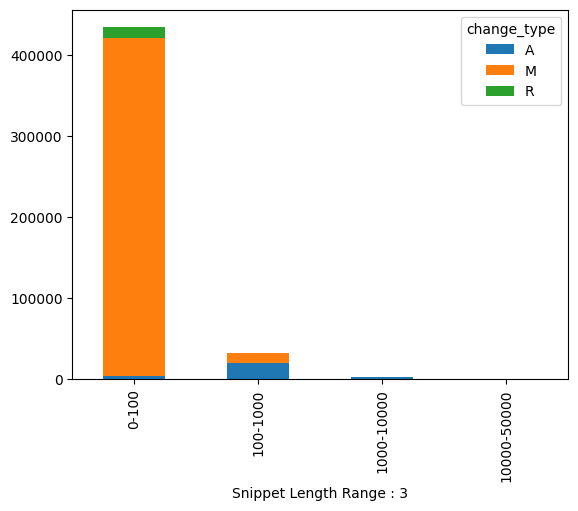

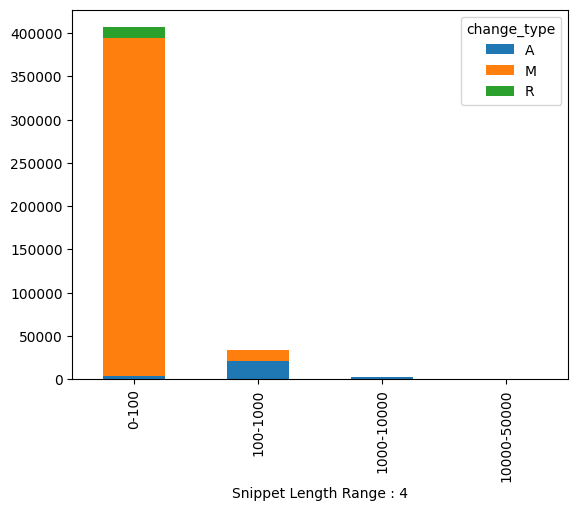

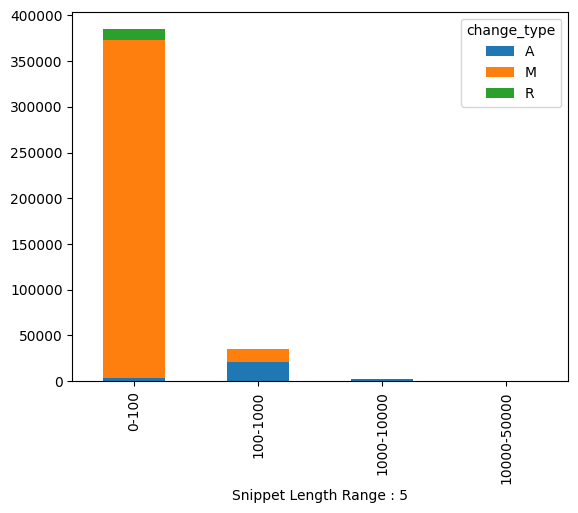

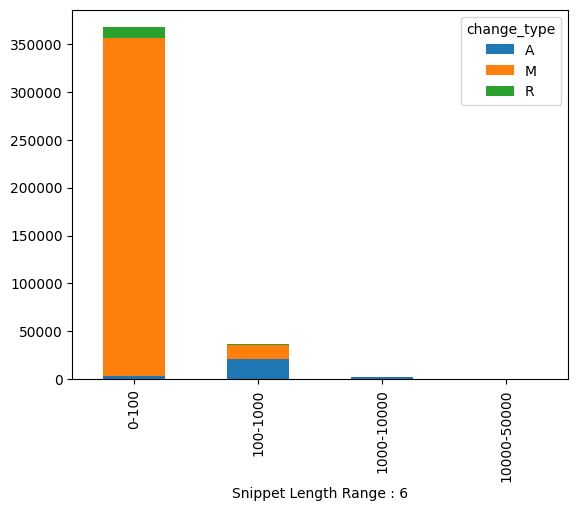

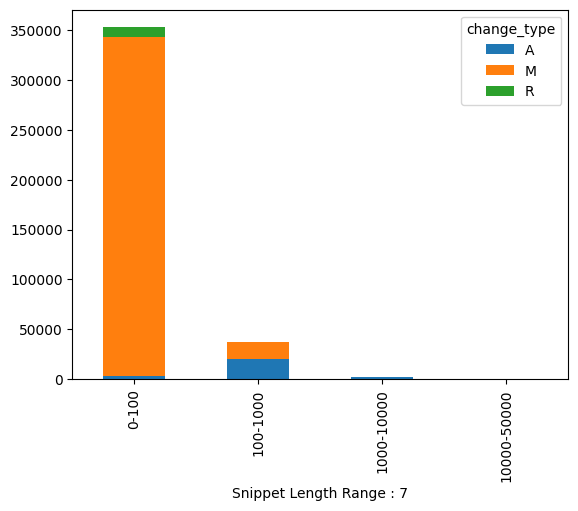

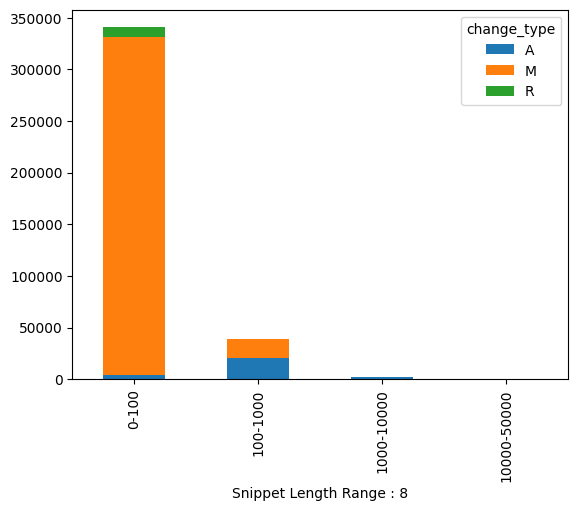

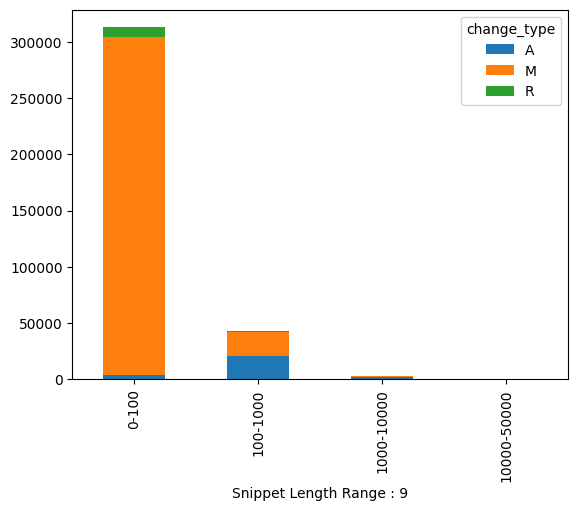

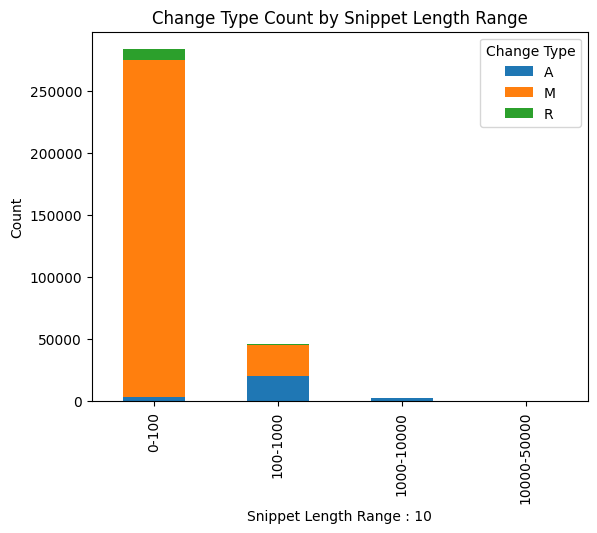

In [29]:
bins = [0, 100, 1000, 10000, 50000]
labels = ['0-100', '100-1000', '1000-10000', '10000-50000']  # 各範囲のラベル

for i , df2 in enumerate(df_list2):
    df2['snippet_length_range'] = pd.cut(df2['snippet_length'], bins=bins, labels=labels)

    # 範囲ごとのchange_typeの数を計算
    change_type_counts = df2.groupby(['snippet_length_range', 'change_type']).size().unstack()
    # print(change_type_counts)
    change_type_counts.plot(kind='bar', stacked=True)
    plt.xlabel('Snippet Length Range : ' + str(i))


plt.ylabel('Count')
plt.title('Change Type Count by Snippet Length Range')
plt.legend(title='Change Type')

plt.show()